# Hybrid Model for detecting the probabilities of the fraud in credit Card application information dataset

Here the hybrid model was built using Artificial Neural Network (ANN) and Self Organization Maps (SOM) deep learning models. The dataset here used for this case study was the credit card application information data.
The intutiton behind the case study is to identify the fraud using SOM and then the idea is to develop advance deep learning which will predic the probabilities of each customer cheated.

## Part 1 - Identify the frauds using SOM

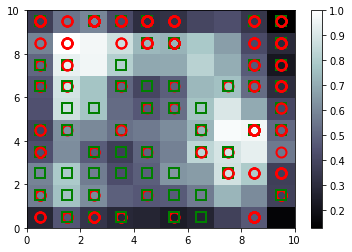

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
plt.show()

In [4]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(9,5)], mappings[(2,9)]), axis = 0)
frauds = sc.inverse_transform(frauds)

## Part 2- Going from Unsupervised to Supervised Deep Learning

### Preparing the data for inputting it in ANN

In [5]:
# Creating the matrix of feature values
customers = dataset.iloc[:,1:].values

# Creating the dependent vairavle
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

### Buidling and the Fitting the ANN

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

# Build the ANN
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = customers.shape[1]))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Using TensorFlow backend.


Epoch 1/2
690/690 [==============================] - 1s 1ms/step - loss: 0.5146 - acc: 0.9478
Epoch 2/2
690/690 [==============================] - 0s 706us/step - loss: 0.2733 - acc: 0.9478


### Predicting the probabilities of the frauds

In [9]:
y_pred = classifier.predict(customers)

# Combining the probabilities with the customer IDs
y_pred = np.concatenate((dataset.iloc[:,0:1].values,y_pred), axis = 1)

# Soring accoring to probability (lowest first)
y_pred = y_pred[y_pred[:,1].argsort()]
np.set_printoptions(suppress=True)
print(y_pred)

[[15788215.                0.01846487]
 [15768474.                0.02373159]
 [15623072.                0.02776421]
 ...
 [15799785.                0.32362697]
 [15698749.                0.32362697]
 [15696287.                0.32362697]]
